In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

**2**.**Load The Dataset**

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv") 

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data = data.rename({'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, axis=1) 

 **3. Perform Below Visualizations.**
● Univariate Analysis
● Bi - Variate Analysis
● Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


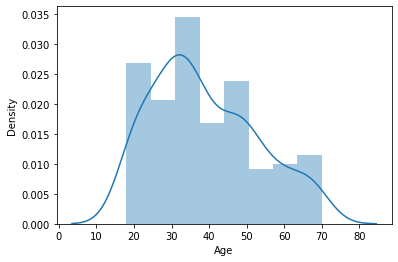

In [7]:
sns.distplot(data.Age) #univariate analysis

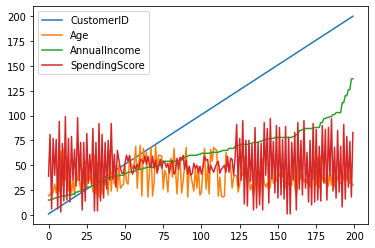

In [8]:
data.plot.line() #bivariate analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


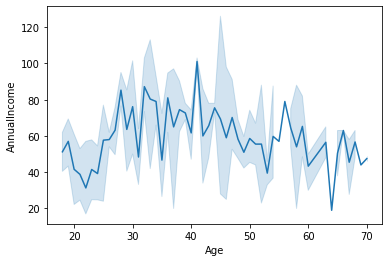

In [9]:
sns.lineplot(data.Age,data.AnnualIncome)   #bivariate analysis

In [10]:
def countplot_of_2(x,hue,title=None,figsize=(6,5)):
  plt.figure(figsize=figsize)
  sns.countplot(data=data[[x,hue]],x=x,hue=hue)
  plt.title(title)
  plt.show()

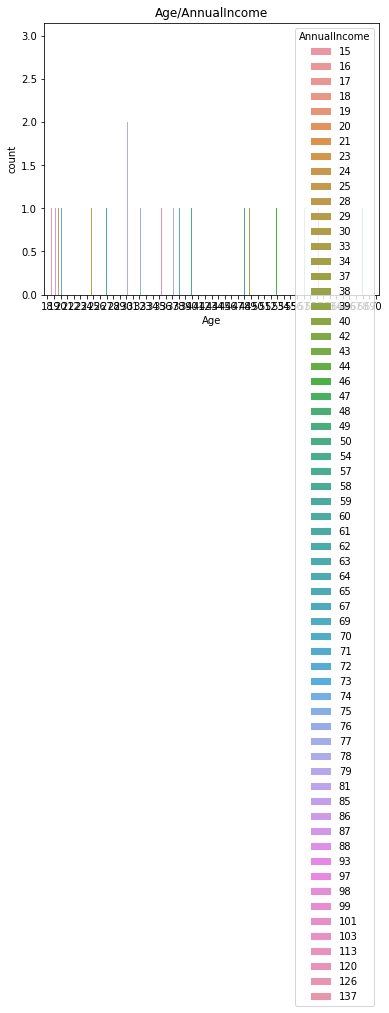

In [11]:
countplot_of_2('Age','AnnualIncome','Age/AnnualIncome')


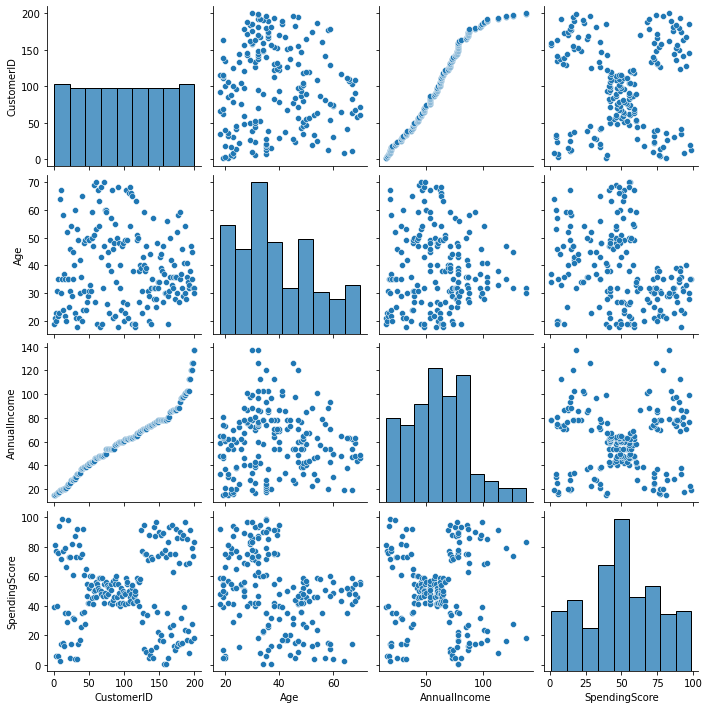

In [12]:
sns.pairplot(data)  #multivariate analysis

In [13]:
data.corr()

,CustomerID,Age,AnnualIncome,SpendingScore
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
AnnualIncome,0.977548,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.327227,0.009903,1.000000


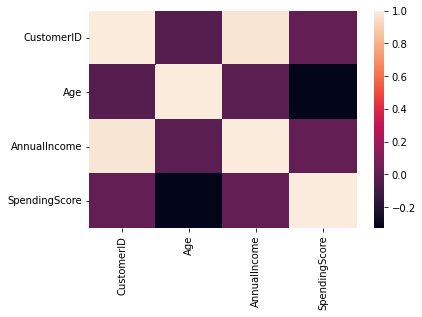

In [14]:
sns.heatmap(data.corr())

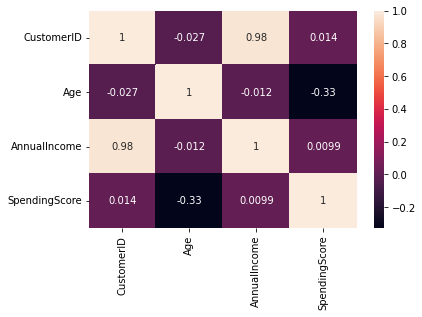

In [15]:
sns.heatmap(data.corr(),annot=True)

 **4. Perform descriptive statistics on the dataset.**

In [16]:
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


 **5. Handle the Missing values.**

In [17]:
data.isnull().any()

CustomerID       False
Gender           False
Age              False
AnnualIncome     False
SpendingScore    False
dtype: bool

**6. Find the outliers and replace the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


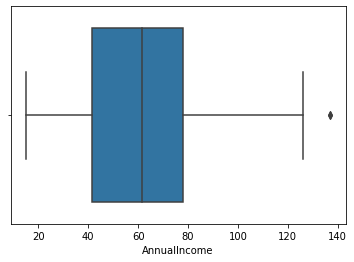

In [18]:
sns.boxplot(data.AnnualIncome)

***Replacing outliers using median***

In [19]:
data.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID       100.5
Age               36.0
AnnualIncome      61.5
SpendingScore     50.0
dtype: float64

In [20]:
Q1=data.AnnualIncome.quantile(0.25)
Q3=data.AnnualIncome.quantile(0.75)

In [21]:
IQR=Q3-Q1
IQR

36.5

In [22]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
upper_limit

132.75

In [23]:
data['AnnualIncome']=np.where(data['AnnualIncome']>upper_limit,61.5,data['AnnualIncome'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


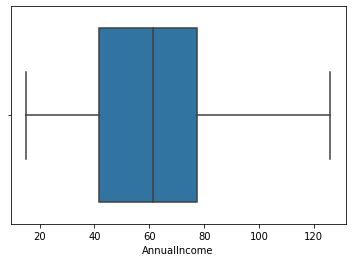

In [24]:
sns.boxplot(data.AnnualIncome)

**7. Check for Categorical columns and perform encoding.**

In [25]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15.0,39
1,2,Male,21,15.0,81
2,3,Female,20,16.0,6
3,4,Female,23,16.0,77
4,5,Female,31,17.0,40


***Encoding Techniques***

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le=LabelEncoder()

In [28]:
data.Gender=le.fit_transform(data.Gender)


In [ ]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


**8. Scalaing the data**

In [29]:
from sklearn.preprocessing import scale

In [30]:
X= data.iloc[:, :-1]

In [31]:
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,CustomerID,Gender,Age,AnnualIncome
0,-1.723412,1.128152,-1.424569,-1.788777
1,-1.706091,1.128152,-1.281035,-1.788777
2,-1.688771,-0.886405,-1.352802,-1.748853
3,-1.671450,-0.886405,-1.137502,-1.748853
4,-1.654129,-0.886405,-0.563369,-1.708930


In [32]:
new_df=data.iloc[:,:-1]
new_df.head()

,CustomerID,Gender,Age,AnnualIncome
0,1,1,19,15.0
1,2,1,21,15.0
2,3,0,20,16.0
3,4,0,23,16.0
4,5,0,31,17.0


**9. Perform any of the clustering algorithms**

In [33]:
from sklearn import cluster


In [34]:
error=[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

In [35]:
error

[831009.6750000002,
 248745.41899189912,
 135238.0624423963,
 94523.42731049322,
 73729.87228029422,
 63250.9915705841,
 53926.90850558296,
 46252.6478120446,
 41110.509208234784,
 36366.07075777679]

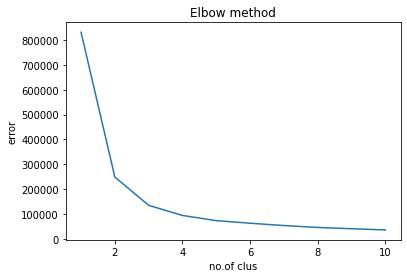

In [36]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('no.of clus')
plt.ylabel('error')
plt.show()

**10. Add the cluster data with the primary dataset**

In [40]:
from sklearn.cluster import KMeans

In [41]:
km_model=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [42]:
km_model.fit(new_df)

KMeans(n_clusters=3, random_state=0)

In [43]:
KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=3, random_state=0)

In [44]:
km_model.predict(new_df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [45]:
km_model.predict([[5.3,2.5,0.4,1.2]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


array([1], dtype=int32)

**11. Split the data into dependent and independent variables**

**Dependent variable**

In [46]:
Y= data.iloc[:, -1]
Y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: SpendingScore, Length: 200, dtype: int64

**independent variable**

In [47]:
X= data.iloc[:, 1:7]
X

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40
...,...,...,...,...
195,0,35,120.0,79
196,0,45,126.0,28
197,1,32,126.0,74
198,1,32,61.5,18


**12. Split the data into training and testing**

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state =42)

In [50]:
X_train

,Gender,Age,AnnualIncome,SpendingScore
114,0,18,65.0,48
173,1,36,87.0,92
5,0,22,17.0,76
126,1,43,71.0,35
117,0,49,65.0,59
...,...,...,...,...
106,0,66,63.0,50
14,1,37,20.0,13
92,1,48,60.0,49
179,1,35,93.0,90


In [51]:
X_test

,Gender,Age,AnnualIncome,SpendingScore
95,1,24,60.0,52
15,1,22,20.0,79
30,1,60,30.0,4
158,1,34,78.0,1
128,1,59,71.0,11
115,0,19,65.0,50
69,0,32,48.0,47
170,1,40,87.0,13
174,0,52,88.0,13
45,0,24,39.0,65


In [52]:
Y_test

95     52
15     79
30      4
158     1
128    11
115    50
69     47
170    13
174    13
45     65
66     50
182    15
165    75
78     52
186    24
177    69
56     50
152    20
82     41
68     59
124    29
16     35
148    22
93     40
65     59
60     56
84     57
67     48
125    77
132    34
9      72
18     29
55     41
75     54
150    17
104    56
135    88
137    73
164    26
76     53
79     42
197    74
38     26
24     14
122    58
195    79
29     87
19     98
143    87
86     58
Name: SpendingScore, dtype: int64

In [53]:
Y_train

114    48
173    92
5      76
126    35
117    59
       ..
106    50
14     13
92     49
179    90
102    59
Name: SpendingScore, Length: 150, dtype: int64


 **13. Build the model**

In [54]:
from sklearn.svm import SVC
model=SVC()

In [55]:
model.fit(X_train,Y_train)

SVC()

In [56]:
SVC()

SVC()

**14. Train the model**

In [57]:
y_pred_train=model.predict(X_train)
y_pred_train

array([42, 75, 73, 42, 55, 55,  5, 42,  5, 42, 55, 42, 73, 14, 73, 55, 42,
       75, 55,  5, 55, 75,  5, 73, 42, 42, 42, 75, 42, 42,  6, 42, 55, 75,
       75, 42, 75,  5,  5, 42,  5, 75, 42, 73, 73,  5, 75,  5, 73, 42, 42,
        5, 42, 75, 55,  5, 14, 55, 42, 42,  5, 42,  5, 75, 55, 75, 55, 42,
       75, 42, 42, 55, 75,  5, 73, 73, 42, 75, 55, 73,  5, 42, 42,  5, 55,
        5, 73, 42, 55, 55,  5,  5, 75, 42, 55, 14, 73, 55, 42, 42,  5, 75,
       42,  5, 73, 42, 75, 75, 73, 55, 75,  5, 75, 75, 55, 42, 42, 55, 16,
       42, 42, 55, 73, 55, 42,  5, 75, 73, 75, 75, 73, 42, 75,  5, 75, 42,
       42, 55, 42, 55, 42, 75, 42,  5, 42, 55,  6, 42, 75, 55])

**15. Test the model**

In [58]:
y_pred=model.predict(X_test)
y_pred

array([42, 73,  5,  5,  5, 42, 42,  5,  5, 73, 42,  5, 75, 42,  5, 75, 55,
        5, 55, 42, 42, 42,  5, 42, 42, 55, 42, 55, 75, 42, 73, 42, 42, 42,
        5, 55, 75, 75, 42, 55, 42, 75, 42, 14, 55, 75, 73, 73, 75, 55])

**16.Measure the performance using Metrics**

In [59]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
accuracy_score(Y_test,y_pred)

0.06

In [61]:
accuracy_score(Y_train,y_pred_train)

0.16666666666666666

In [62]:
#classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         2
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         2
          42       0.06    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1